In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_path = 'employee_churn_data.csv'
turnover_df = pd.read_csv(csv_path)
turnover_df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [3]:
turnover_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [4]:
#categorical columns turned into numerical
label_encoder = LabelEncoder()
turnover_df['salary'] = label_encoder.fit_transform(turnover_df['salary'])
turnover_df['department'] = label_encoder.fit_transform(turnover_df['department'])
turnover_df['left'] = label_encoder.fit_transform(turnover_df['left'])

In [5]:
# Split features and target variable
X = turnover_df.drop('left', axis=1)
y = turnover_df['left']
y

0       0
1       0
2       0
3       0
4       0
       ..
9535    1
9536    1
9537    1
9538    1
9539    1
Name: left, Length: 9540, dtype: int32

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#scaling our data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [8]:
#creating model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=1000,
                                random_state=1)
classifier

LogisticRegression(max_iter=1000, random_state=1)

In [11]:
#fitting model on our unscaled data 
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [12]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [13]:
#getting predictions for our scaled test data
predictions = classifier.predict(X_test_scaled)

In [15]:
#test data set
print(f"Testing Accuracy Score: {accuracy_score(y_test, predictions)}")
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names = ['not leaving', 'leaving']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))


Testing Accuracy Score: 0.7311320754716981

Classification Report:
              precision    recall  f1-score   support

 not leaving       0.74      0.95      0.83      1330
     leaving       0.67      0.22      0.34       578

    accuracy                           0.73      1908
   macro avg       0.70      0.59      0.58      1908
weighted avg       0.72      0.73      0.68      1908


Confusion Matrix:
[[1265   65]
 [ 448  130]]


In [16]:
train_predictions = classifier.predict(X_train_scaled)

In [17]:
#training data reports
print(f' Training Accuracy Score: ', accuracy_score(y_train, train_predictions))
print("\nClassification Report:")
print(classification_report(y_train, train_predictions, target_names = ['not leaving', 'leaving']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_train, train_predictions))

 Training Accuracy Score:  0.7333595387840671

Classification Report:
              precision    recall  f1-score   support

 not leaving       0.75      0.94      0.83      5426
     leaving       0.61      0.22      0.32      2206

    accuracy                           0.73      7632
   macro avg       0.68      0.58      0.58      7632
weighted avg       0.71      0.73      0.69      7632


Confusion Matrix:
[[5108  318]
 [1717  489]]


In [18]:
#train importance df
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Get the feature importance (coefficients)
feature_importance = model.coef_[0]

# Create a DataFrame for easy viewing
feature_names = X.columns  # Assuming X is a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

         Feature  Importance
2         review    0.933413
6   satisfaction    0.385084
8  avg_hrs_month    0.367450
4         salary    0.032709
0     department   -0.013433
3       projects   -0.014418
7          bonus   -0.024395
1       promoted   -0.097614
5         tenure   -0.108770


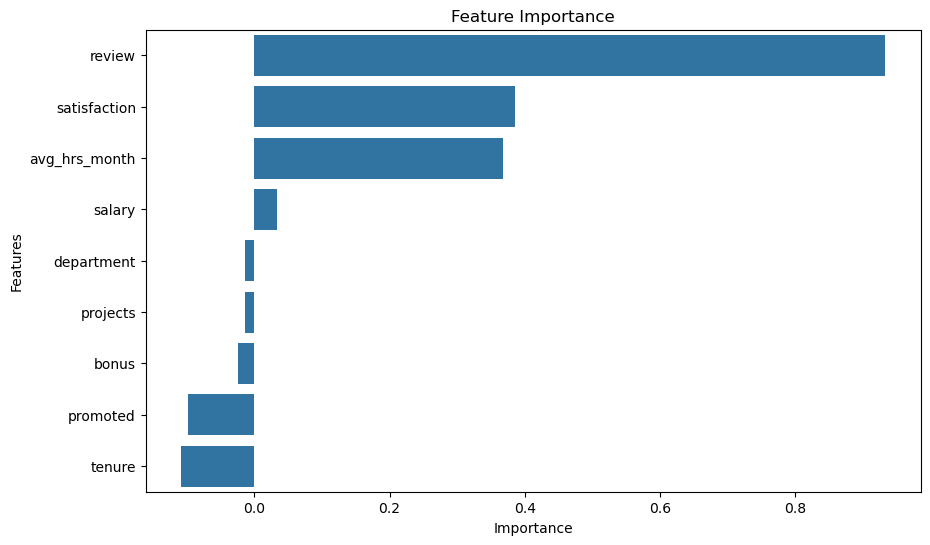

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [22]:
#test importance df
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

model = LogisticRegression()
model.fit(X_test_scaled, y_test)

# Get the feature importance (coefficients)
feature_importance = model.coef_[0]

# Create a DataFrame for easy viewing
feature_names = X.columns  # Assuming X is a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


         Feature  Importance
2         review    1.023313
5         tenure    0.406741
6   satisfaction    0.404325
0     department    0.055922
4         salary    0.004134
7          bonus   -0.020784
1       promoted   -0.087659
3       projects   -0.144251
8  avg_hrs_month   -0.153577


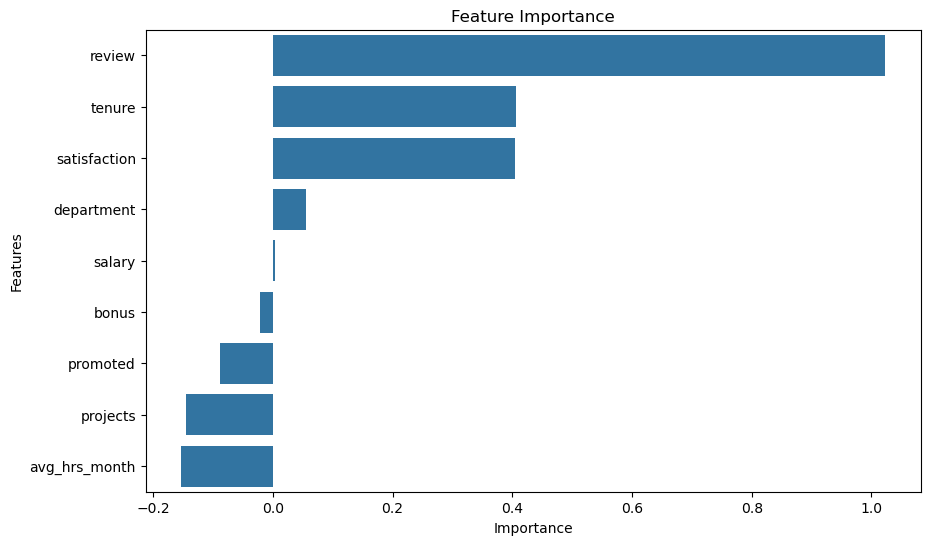

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()